In [1]:
import matplotlib.pyplot as plt
import numpy as np
import Mors as mors
import pandas as pd
import os

In [26]:
masses = np.linspace(0.1,1.2,50)
FxHZ_50 = np.empty(len(masses))
FxHZ_5 = np.empty(len(masses))
FxHZ_95 = np.empty(len(masses))

#this is an attempt to recreate the plot from the paper of the red line (50th percentile rotation) with an age of 500Myr, stellar mass vs FxHZ
for i,mass in enumerate(masses):
    star = mors.Star(Mstar = mass, percentile=50)
    star.Save(filename = 'p50_m'+str(mass)+'.pickle')
    FxHZ_50[i] = star.Value(Age = 500.0, Quantity = 'FxHZ')

for i,mass in enumerate(masses):
    star = mors.Star(Mstar = mass, percentile=5)
    star.Save(filename = 'p05_m'+str(mass)+'.pickle')
    FxHZ_5[i] = star.Value(Age = 500.0, Quantity = 'FxHZ')

for i,mass in enumerate(masses):
    star = mors.Star(Mstar = mass, percentile=95.0)
    star.Save(filename = 'p95_m'+str(mass)+'.pickle')
    FxHZ_95[i] = star.Value(Age = 500.0, Quantity = 'FxHZ')

Text(0.5, 1.0, 'Xray flux in HZ as a function of stellar mass')

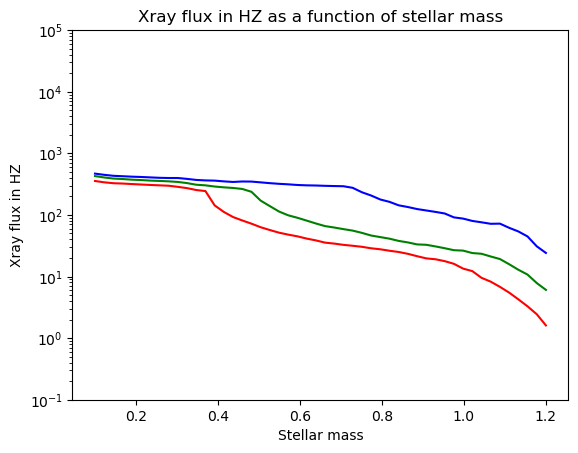

In [27]:
plt.plot(masses,FxHZ_50,'g')
plt.plot(masses, FxHZ_5,'r')
plt.plot(masses, FxHZ_95, 'blue')
plt.yscale('log')
plt.ylim(10**-1,10**5)
plt.xlabel('Stellar mass')
plt.ylabel('Xray flux in HZ')
plt.title('Xray flux in HZ as a function of stellar mass')

In [30]:
masses = np.linspace(0.1,1.2,50)

for mass in masses:
    star = mors.Star(Mstar = mass, percentile=50)
    star.Save(filename = 'p50_m'+str(mass)+'.pickle')

    star = mors.Star(Mstar = mass, percentile=5)
    star.Save(filename = 'p05_m'+str(mass)+'.pickle')

    star = mors.Star(Mstar = mass, percentile=95.0)
    star.Save(filename = 'p95_m'+str(mass)+'.pickle')


    

/home/pcosta/.local/lib/python3.11/site-packages/Mors/physicalmodel.py:896: RuntimeWarning: invalid value encountered in scalar power
  timeCE = params['aCoreEnvelope'] * StarState['OmegaEnv']**params['bCoreEnvelope'] * StarState['Mstar']**params['cCoreEnvelope']
/home/pcosta/.local/lib/python3.11/site-packages/Mors/physicalmodel.py:874: RuntimeWarning: invalid value encountered in scalar power
  ageDL = params['aDiskLock'] * StarState['OmegaEnv']**params['bDiskLock']


In [2]:
masses = np.linspace(0.1,1.2,50)

for mass in masses:

    star = mors.Star(Mstar = mass, percentile=10)
    star.Save(filename = 'p10_m'+str(mass)+'.pickle')

    star = mors.Star(Mstar = mass, percentile=90.0)
    star.Save(filename = 'p90_m'+str(mass)+'.pickle')

/home/pcosta/.local/lib/python3.11/site-packages/Mors/physicalmodel.py:896: RuntimeWarning: invalid value encountered in scalar power
  timeCE = params['aCoreEnvelope'] * StarState['OmegaEnv']**params['bCoreEnvelope'] * StarState['Mstar']**params['cCoreEnvelope']
/home/pcosta/.local/lib/python3.11/site-packages/Mors/physicalmodel.py:874: RuntimeWarning: invalid value encountered in scalar power
  ageDL = params['aDiskLock'] * StarState['OmegaEnv']**params['bDiskLock']


In [31]:
star = mors.Load('p05_m0.1.pickle') #it works

In [78]:
sorted(os.listdir('p05_stars'))

['p05_m0.1.pickle',
 'p05_m0.12244897959183673.pickle',
 'p05_m0.14489795918367349.pickle',
 'p05_m0.1673469387755102.pickle',
 'p05_m0.18979591836734694.pickle',
 'p05_m0.21224489795918366.pickle',
 'p05_m0.23469387755102042.pickle',
 'p05_m0.2571428571428571.pickle',
 'p05_m0.2795918367346939.pickle',
 'p05_m0.30204081632653057.pickle',
 'p05_m0.32448979591836735.pickle',
 'p05_m0.3469387755102041.pickle',
 'p05_m0.3693877551020408.pickle',
 'p05_m0.3918367346938776.pickle',
 'p05_m0.41428571428571426.pickle',
 'p05_m0.43673469387755104.pickle',
 'p05_m0.4591836734693877.pickle',
 'p05_m0.4816326530612245.pickle',
 'p05_m0.5040816326530612.pickle',
 'p05_m0.5265306122448979.pickle',
 'p05_m0.5489795918367346.pickle',
 'p05_m0.5714285714285714.pickle',
 'p05_m0.5938775510204082.pickle',
 'p05_m0.6163265306122448.pickle',
 'p05_m0.6387755102040816.pickle',
 'p05_m0.6612244897959183.pickle',
 'p05_m0.6836734693877551.pickle',
 'p05_m0.7061224489795918.pickle',
 'p05_m0.7285714285714285.

Text(0.1, 1, '5000 Myr')

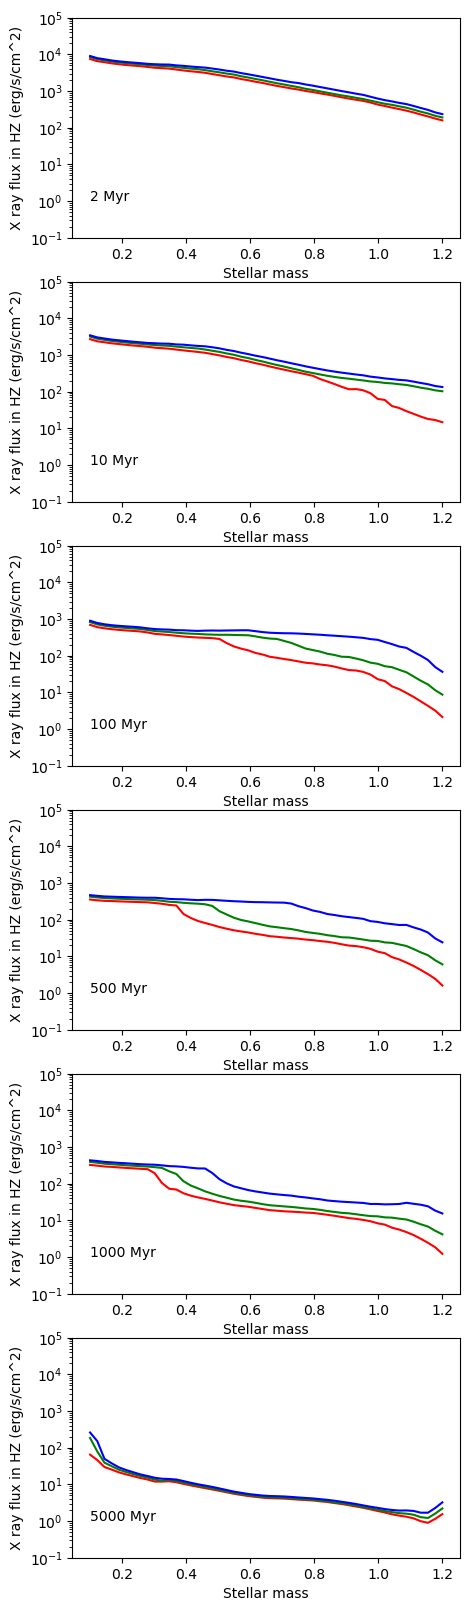

In [97]:
fig,axs = plt.subplots(6,figsize=(5,20))
plt.setp(axs, ylim=(10**-1,10**5))

for ax in axs:
    ax.set_yscale('log')
    ax.set_xlabel('Stellar mass')
    ax.set_ylabel('X ray flux in HZ (erg/s/cm^2)')

masses = np.linspace(0.1,1.2,50)

p05_FxHZ = np.empty(len(masses))
p50_FxHZ = np.empty(len(masses))
p95_FxHZ = np.empty(len(masses))

#age 5000
for i,file in enumerate(sorted(os.listdir('p05_stars'))):
    star = mors.Load(r'p05_stars/'+str(file))
    p05_FxHZ[i] = star.Value(Age = 5000.0, Quantity = 'FxHZ')

axs[5].plot(masses,p05_FxHZ,color='red')

for i,file in enumerate(sorted(os.listdir('p50_stars'))):
    star = mors.Load(r'p50_stars/'+str(file))
    p50_FxHZ[i] = star.Value(Age = 5000.0, Quantity = 'FxHZ')

axs[5].plot(masses,p50_FxHZ,color='green')

for i,file in enumerate(sorted(os.listdir('p95_stars'))):
    star = mors.Load(r'p95_stars/'+str(file))
    p95_FxHZ[i] = star.Value(Age = 5000.0, Quantity = 'FxHZ')

axs[5].plot(masses,p95_FxHZ,color='blue')


#age 1000
for i,file in enumerate(sorted(os.listdir('p05_stars'))):
    star = mors.Load(r'p05_stars/'+str(file))
    p05_FxHZ[i] = star.Value(Age = 1000.0, Quantity = 'FxHZ')

axs[4].plot(masses,p05_FxHZ,color='red')

for i,file in enumerate(sorted(os.listdir('p50_stars'))):
    star = mors.Load(r'p50_stars/'+str(file))
    p50_FxHZ[i] = star.Value(Age = 1000.0, Quantity = 'FxHZ')

axs[4].plot(masses,p50_FxHZ,color='green')

for i,file in enumerate(sorted(os.listdir('p95_stars'))):
    star = mors.Load(r'p95_stars/'+str(file))
    p95_FxHZ[i] = star.Value(Age = 1000.0, Quantity = 'FxHZ')

axs[4].plot(masses,p95_FxHZ,color='blue')

#age 500
for i,file in enumerate(sorted(os.listdir('p05_stars'))):
    star = mors.Load(r'p05_stars/'+str(file))
    p05_FxHZ[i] = star.Value(Age = 500.0, Quantity = 'FxHZ')

axs[3].plot(masses,p05_FxHZ,color='red')

for i,file in enumerate(sorted(os.listdir('p50_stars'))):
    star = mors.Load(r'p50_stars/'+str(file))
    p50_FxHZ[i] = star.Value(Age = 500.0, Quantity = 'FxHZ')

axs[3].plot(masses,p50_FxHZ,color='green')

for i,file in enumerate(sorted(os.listdir('p95_stars'))):
    star = mors.Load(r'p95_stars/'+str(file))
    p95_FxHZ[i] = star.Value(Age = 500.0, Quantity = 'FxHZ')

axs[3].plot(masses,p95_FxHZ,color='blue')


#age 100
for i,file in enumerate(sorted(os.listdir('p05_stars'))):
    star = mors.Load(r'p05_stars/'+str(file))
    p05_FxHZ[i] = star.Value(Age = 100.0, Quantity = 'FxHZ')

axs[2].plot(masses,p05_FxHZ,color='red')

for i,file in enumerate(sorted(os.listdir('p50_stars'))):
    star = mors.Load(r'p50_stars/'+str(file))
    p50_FxHZ[i] = star.Value(Age = 100.0, Quantity = 'FxHZ')

axs[2].plot(masses,p50_FxHZ,color='green')

for i,file in enumerate(sorted(os.listdir('p95_stars'))):
    star = mors.Load(r'p95_stars/'+str(file))
    p95_FxHZ[i] = star.Value(Age = 100.0, Quantity = 'FxHZ')

axs[2].plot(masses,p95_FxHZ,color='blue')

#age 10
for i,file in enumerate(sorted(os.listdir('p05_stars'))):
    star = mors.Load(r'p05_stars/'+str(file))
    p05_FxHZ[i] = star.Value(Age = 10.0, Quantity = 'FxHZ')

axs[1].plot(masses,p05_FxHZ,color='red')

for i,file in enumerate(sorted(os.listdir('p50_stars'))):
    star = mors.Load(r'p50_stars/'+str(file))
    p50_FxHZ[i] = star.Value(Age = 10.0, Quantity = 'FxHZ')

axs[1].plot(masses,p50_FxHZ,color='green')

for i,file in enumerate(sorted(os.listdir('p95_stars'))):
    star = mors.Load(r'p95_stars/'+str(file))
    p95_FxHZ[i] = star.Value(Age = 10.0, Quantity = 'FxHZ')

axs[1].plot(masses,p95_FxHZ,color='blue')


#age 2
for i,file in enumerate(sorted(os.listdir('p05_stars'))):
    star = mors.Load(r'p05_stars/'+str(file))
    p05_FxHZ[i] = star.Value(Age = 2.0, Quantity = 'FxHZ')

axs[0].plot(masses,p05_FxHZ,color='red')

for i,file in enumerate(sorted(os.listdir('p50_stars'))):
    star = mors.Load(r'p50_stars/'+str(file))
    p50_FxHZ[i] = star.Value(Age = 2.0, Quantity = 'FxHZ')

axs[0].plot(masses,p50_FxHZ,color='green')

for i,file in enumerate(sorted(os.listdir('p95_stars'))):
    star = mors.Load(r'p95_stars/'+str(file))
    p95_FxHZ[i] = star.Value(Age = 2.0, Quantity = 'FxHZ')

axs[0].plot(masses,p95_FxHZ,color='blue')



#add titles and text to the plots
axs[0].text(0.1,1,'2 Myr')
axs[1].text(0.1,1,'10 Myr')
axs[2].text(0.1,1,'100 Myr')
axs[3].text(0.1,1,'500 Myr')
axs[4].text(0.1,1,'1000 Myr')
axs[5].text(0.1,1,'5000 Myr')

In [101]:
fig,axs = plt.subplots(6,figsize=(5,20))

for ax in axs:
    #ax.set_yscale('log')
    ax.set_xlabel('Stellar mass')
    ax.set_ylabel('X ray flux in HZ (erg/s/cm^2)')

masses = np.linspace(0.1,1.2,50)

p50_Rx = np.empty(len(masses))
p50_Ro = np.empty(len(masses))



#age 5000


for i,file in enumerate(sorted(os.listdir('p50_stars'))):
    star = mors.Load(r'p50_stars/'+str(file))
    p50_Rx[i] = star.Value(Age = 5000.0, Quantity = 'Rx')
    p50_Ro[i] = star.Value(Age = 5000.0, Quantity = 'Ro')

axs[5].plot(p50_Rx,p50_Ro,color='green')



#age 1000


for i,file in enumerate(sorted(os.listdir('p50_stars'))):
    star = mors.Load(r'p50_stars/'+str(file))
    p50_Rx[i] = star.Value(Age = 1000.0, Quantity = 'Rx')
    p50_Ro[i] = star.Value(Age = 1000.0, Quantity = 'Ro')

axs[4].plot(p50_Rx,p50_Ro,color='green')



#age 500


for i,file in enumerate(sorted(os.listdir('p50_stars'))):
    star = mors.Load(r'p50_stars/'+str(file))
    p50_Rx[i] = star.Value(Age = 500.0, Quantity = 'Rx')
    p50_Ro[i] = star.Value(Age = 500.0, Quantity = 'Ro')

axs[3].plot(p50_Rx,p50_Ro,color='green')




#age 100


for i,file in enumerate(sorted(os.listdir('p50_stars'))):
    star = mors.Load(r'p50_stars/'+str(file))
    p50_Rx[i] = star.Value(Age = 100.0, Quantity = 'Rx')
    p50_Ro[i] = star.Value(Age = 100.0, Quantity = 'Ro')

axs[2].plot(p50_Rx,p50_Ro,color='green')



#age 10


for i,file in enumerate(sorted(os.listdir('p50_stars'))):
    star = mors.Load(r'p50_stars/'+str(file))
    p50_Rx[i] = star.Value(Age = 10.0, Quantity = 'Rx')
    p50_Ro[i] = star.Value(Age = 10.0, Quantity = 'Ro')

axs[1].plot(p50_Rx,p50_Ro,color='green')




#age 2

for i,file in enumerate(sorted(os.listdir('p50_stars'))):
    star = mors.Load(r'p50_stars/'+str(file))
    p50_Rx[i] = star.Value(Age = 2.0, Quantity = 'Rx')
    p50_Ro[i] = star.Value(Age = 2.0, Quantity = 'Ro')

axs[0].plot(p50_Rx,p50_Ro,color='green')





#add titles and text to the plots
axs[0].text(0.1,1,'2 Myr')
axs[1].text(0.1,1,'10 Myr')
axs[2].text(0.1,1,'100 Myr')
axs[3].text(0.1,1,'500 Myr')
axs[4].text(0.1,1,'1000 Myr')
axs[5].text(0.1,1,'5000 Myr')

Text(0.1, 1, '5000 Myr')

ValueError: Image size of 382806x23305 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 500x2000 with 6 Axes>

Text(0.5, 1.0, 'Ro (x) vs Rx (y) at 1000Myr')

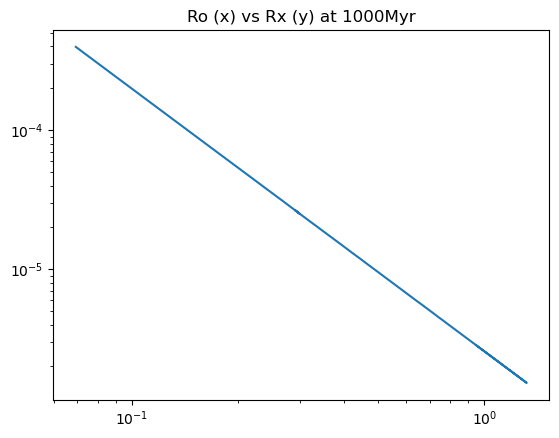

In [119]:
masses = np.linspace(0.1,1.2,50)

p50_Rx = np.empty(len(masses))
p50_Ro = np.empty(len(masses))



#age 5000


for i,file in enumerate(sorted(os.listdir('p50_stars'))):
    star = mors.Load(r'p50_stars/'+str(file))
    p50_Rx[i] = star.Value(Age = 5000.0, Quantity = 'Rx')
    p50_Ro[i] = star.Value(Age = 5000.0, Quantity = 'Ro')

plt.yscale('log')
plt.xscale('log')
plt.plot(p50_Ro,p50_Rx)
plt.title('Ro (x) vs Rx (y) at 1000Myr')